In [1]:
# Step 1 : Data Ingestion

In [17]:
from scipy.cluster.hierarchy import linkage, dendrogram 
from sklearn.metrics import silhouette_score 
from sklearn.cluster import KMeans 
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as mp
import numpy as np  
import pandas as pd 
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import KMeans

In [6]:
bank = pd.read_csv(r"C:\Users\akank\Downloads\bank_marketing_part1_Data.csv")

In [7]:
# Check dimensions 
print("Rows and Columns:", bank)

Rows and Columns:      spending  advance_payments  probability_of_full_payment  current_balance  \
0       19.94             16.92                       0.8752            6.675   
1       15.99             14.89                       0.9064            5.363   
2       18.95             16.42                       0.8829            6.248   
3       10.83             12.96                       0.8099            5.278   
4       17.99             15.86                       0.8992            5.890   
..        ...               ...                          ...              ...   
205     13.89             14.02                       0.8880            5.439   
206     16.77             15.62                       0.8638            5.927   
207     14.03             14.16                       0.8796            5.438   
208     16.12             15.00                       0.9000            5.709   
209     15.57             15.15                       0.8527            5.920   

     cred

In [8]:
bank.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


In [9]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   spending                      210 non-null    float64
 1   advance_payments              210 non-null    float64
 2   probability_of_full_payment   210 non-null    float64
 3   current_balance               210 non-null    float64
 4   credit_limit                  210 non-null    float64
 5   min_payment_amt               210 non-null    float64
 6   max_spent_in_single_shopping  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


In [11]:
bank.shape

(210, 7)

In [12]:
print(bank.isnull().sum())  
print(bank.duplicated().sum())  


spending                        0
advance_payments                0
probability_of_full_payment     0
current_balance                 0
credit_limit                    0
min_payment_amt                 0
max_spent_in_single_shopping    0
dtype: int64
0


In [14]:
print("\nData Statistics:")
print(bank.describe())


Data Statistics:
         spending  advance_payments  probability_of_full_payment  \
count  210.000000        210.000000                   210.000000   
mean    14.847524         14.559286                     0.870999   
std      2.909699          1.305959                     0.023629   
min     10.590000         12.410000                     0.808100   
25%     12.270000         13.450000                     0.856900   
50%     14.355000         14.320000                     0.873450   
75%     17.305000         15.715000                     0.887775   
max     21.180000         17.250000                     0.918300   

       current_balance  credit_limit  min_payment_amt  \
count       210.000000    210.000000       210.000000   
mean          5.628533      3.258605         3.700201   
std           0.443063      0.377714         1.503557   
min           4.899000      2.630000         0.765100   
25%           5.262250      2.944000         2.561500   
50%           5.523500     

C:\Users\akank\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\akank\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\akank\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\akank\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\akank\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\akank\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\a

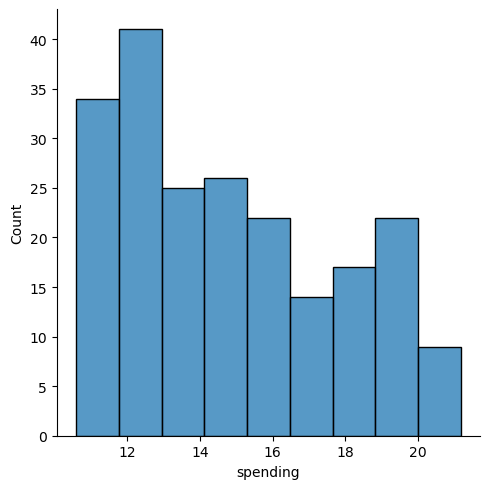

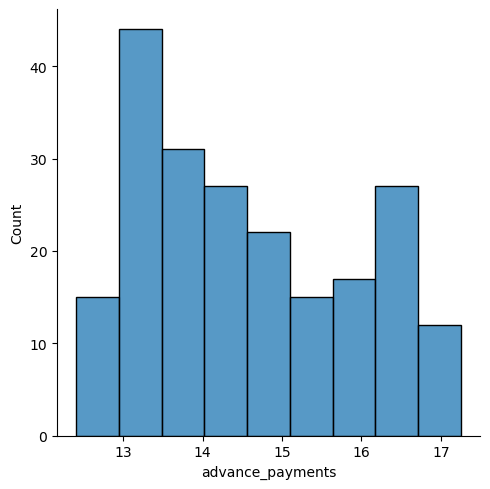

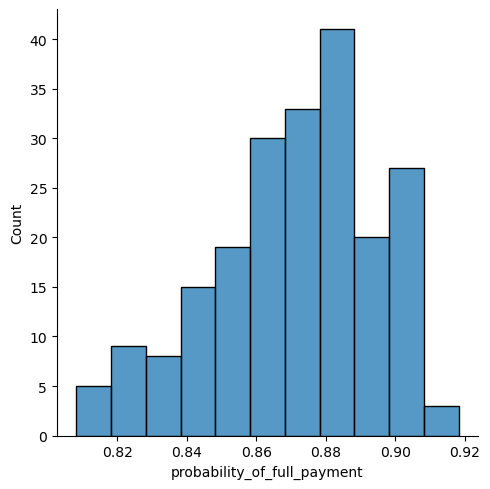

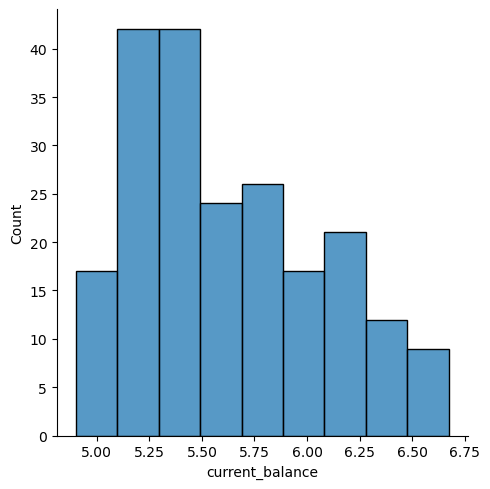

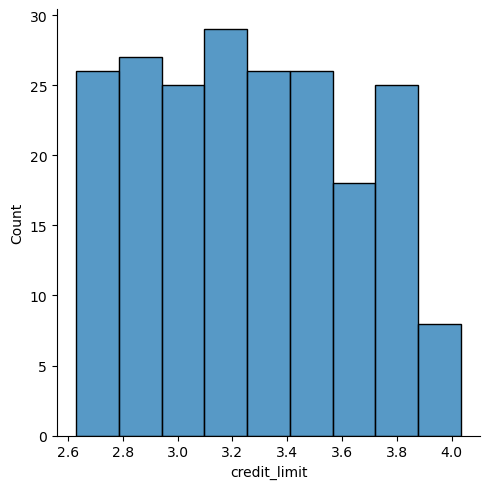

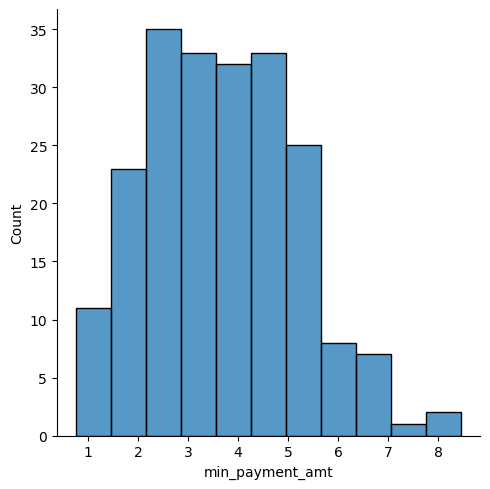

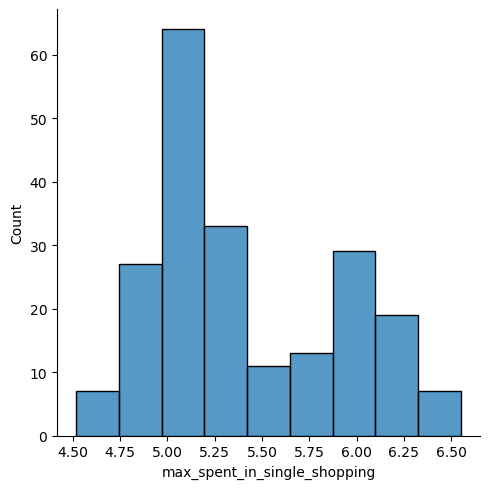

In [19]:
# Histogram
for col in bank.columns:
        sns.displot(bank[col])  

C:\Users\akank\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'PAIRPLIOT OF ALL VARIABLES')

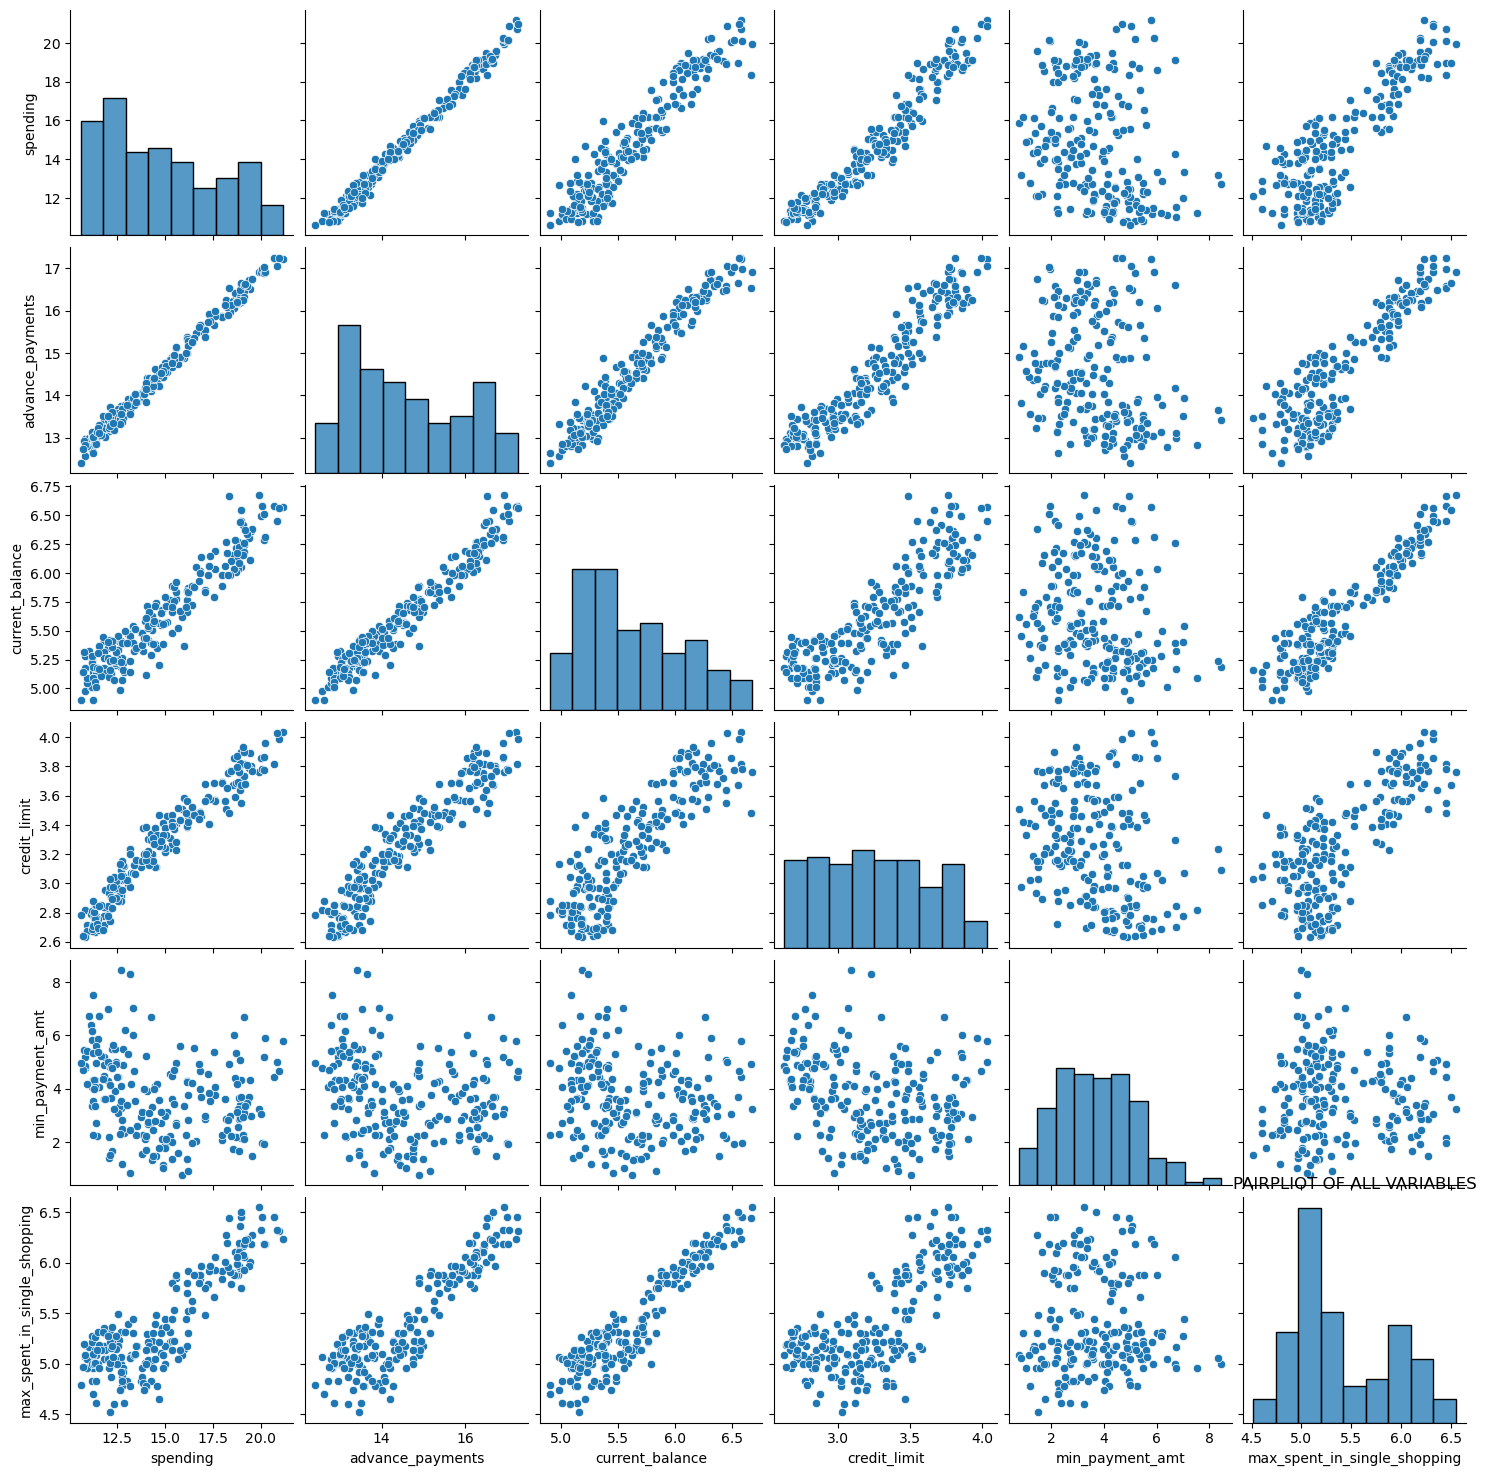

In [20]:
sns.pairplot(bank[['spending','advance_payments','current_balance','credit_limit','min_payment_amt','max_spent_in_single_shopping']]);
plt.title('PAIRPLIOT OF ALL VARIABLES')

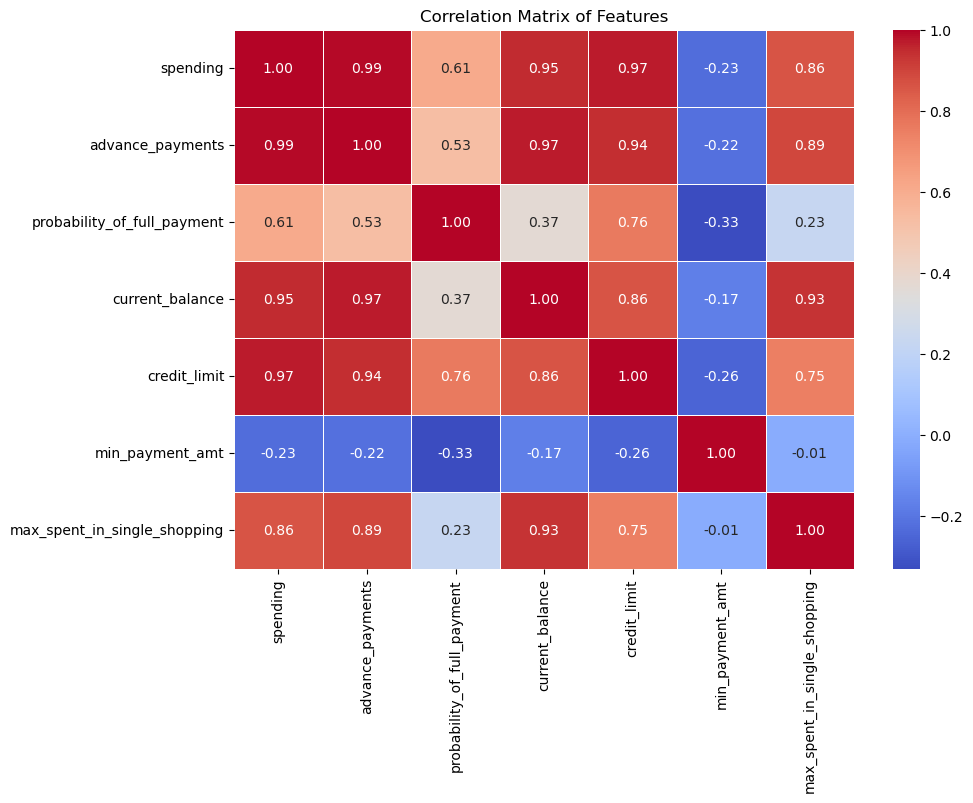

In [21]:
# Correlation matrix heatmap
plt.figure(figsize=(10, 7))
correlation_matrix = bank.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Features')
plt.show()

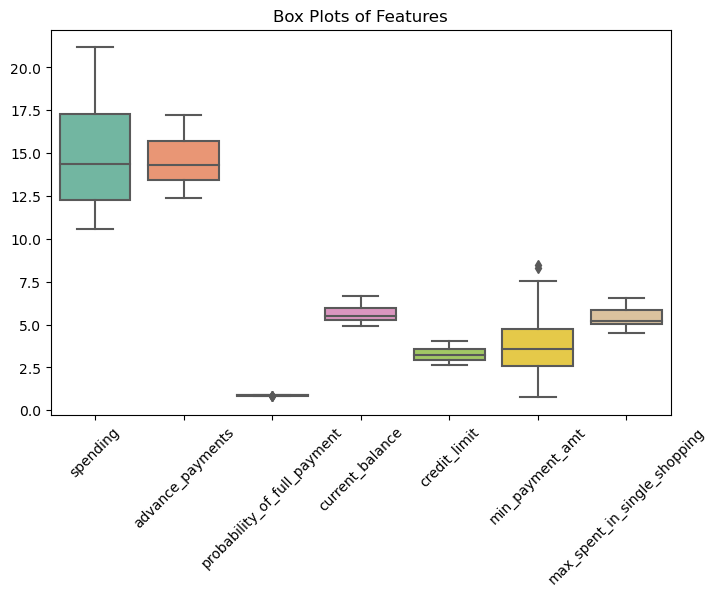

In [23]:
# Box plot for 'current_balance' to explore spread and outliers
plt.figure(figsize=(8, 5))
sns.boxplot(data=bank, palette='Set2')
plt.xticks(rotation=45)
plt.title('Box Plots of Features')
plt.show()

In [24]:
plt.style.use('ggplot')  # Changed from 'seaborn-v0_8-darkgrid'

In [26]:
# scaling the data
X = bank
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [27]:
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
print(X_scaled.mean())
print()
print()
print(X_scaled.std())

spending                        9.008667e-16
advance_payments                1.184238e-16
probability_of_full_payment     1.243450e-15
current_balance                -1.057355e-16
credit_limit                   -3.267228e-16
min_payment_amt                 5.244482e-16
max_spent_in_single_shopping   -1.937075e-15
dtype: float64


spending                        1.002389
advance_payments                1.002389
probability_of_full_payment     1.002389
current_balance                 1.002389
credit_limit                    1.002389
min_payment_amt                 1.002389
max_spent_in_single_shopping    1.002389
dtype: float64


In [29]:
# K-Means Clustering Preparation
scaler = StandardScaler()
normalized_data = scaler.fit_transform(bank)
normalized_df = pd.DataFrame(normalized_data, columns=bank.columns)

In [30]:
# Determine optimal number of clusters (Elbow method)
inertia_list = []
k_range = range(2, 6)  # Slightly different range
for k in k_range:
    kmeans_temp = KMeans(n_clusters=k, random_state=10)  # Different random state
    kmeans_temp.fit(normalized_data)
    inertia_list.append(kmeans_temp.inertia_)

C:\Users\akank\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\akank\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\akank\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\akank\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

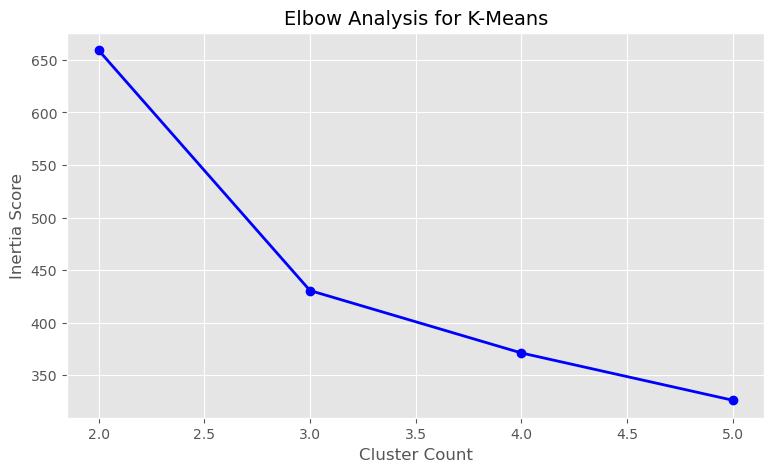

In [31]:
plt.figure(figsize=(9, 5))  # Ensure correct function usage
plt.plot(k_range, inertia_list, marker='o', linestyle='-', color='b', linewidth=2)  # Improved styling
plt.title('Elbow Analysis for K-Means', fontsize=14)
plt.xlabel('Cluster Count', fontsize=12)
plt.ylabel('Inertia Score', fontsize=12)
plt.grid(True)  # Improve readability
plt.show()

In [32]:
# Apply K-Means with k=3 (assumed from your scatter plot)
kmeans_model = KMeans(n_clusters=3, random_state=10)
bank['cluster_group'] = kmeans_model.fit_predict(normalized_data)

C:\Users\akank\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\akank\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


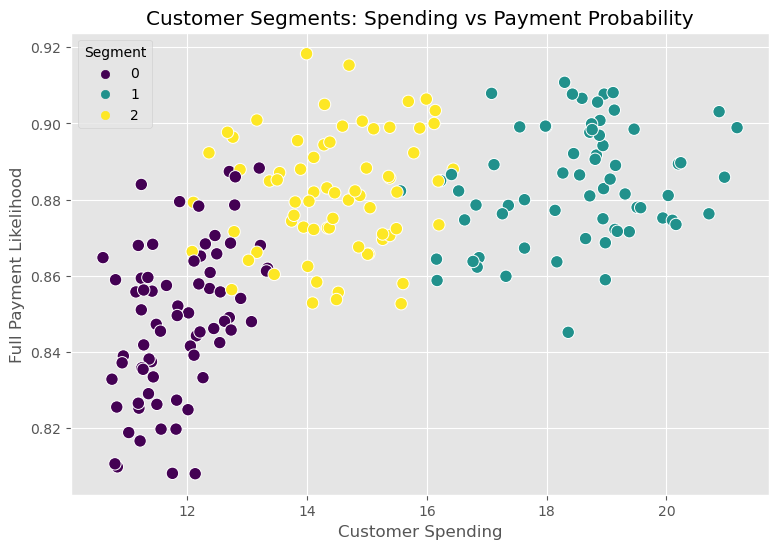

In [33]:
# Visualize clusters with a different palette and layout
plt.figure(figsize=(9, 6))  # Adjusted size
sns.scatterplot(x='spending', y='probability_of_full_payment', hue='cluster_group', 
                data=bank, palette='viridis', s=80)  # Different palette and size
plt.title('Customer Segments: Spending vs Payment Probability')
plt.xlabel('Customer Spending')
plt.ylabel('Full Payment Likelihood')
plt.legend(title='Segment')
plt.show()

C:\Users\akank\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\akank\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\akank\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\akank\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

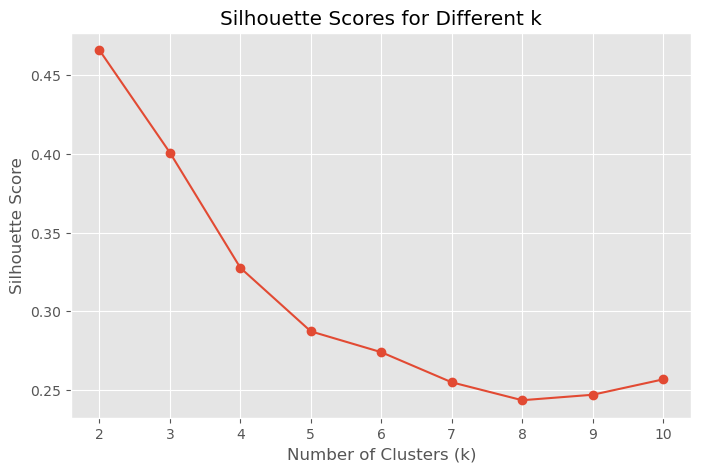

In [34]:
# Silhouette Analysis 
sil_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    sil_scores.append(silhouette_score(X_scaled, labels))
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), sil_scores, marker='o')
plt.title('Silhouette Scores for Different k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

In [35]:
optimal_k = 3  # Adjust this after inspecting the plots
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)
bank['kmeans_cluster'] = kmeans_labels

C:\Users\akank\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\akank\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [37]:
kmeans_cluster_means = bank.groupby('kmeans_cluster').mean()
print("K-Means Clustering - Cluster Means:")
print(kmeans_cluster_means)

K-Means Clustering - Cluster Means:
                 spending  advance_payments  probability_of_full_payment  \
kmeans_cluster                                                             
0               18.495373         16.203433                     0.884210   
1               11.856944         13.247778                     0.848253   
2               14.437887         14.337746                     0.881597   

                current_balance  credit_limit  min_payment_amt  \
kmeans_cluster                                                   
0                      6.175687      3.697537         3.632373   
1                      5.231750      2.849542         4.742389   
2                      5.514577      3.259225         2.707341   

                max_spent_in_single_shopping  cluster_group  
kmeans_cluster                                               
0                                   6.041701            1.0  
1                                   5.101722            0.0  
2   

In [38]:
# computing silhouette score for k means
kmeans_silhouette = silhouette_score(X_scaled, kmeans_labels)
print(f"K-Means Clustering Silhouette Score: {kmeans_silhouette:.3f}")

K-Means Clustering Silhouette Score: 0.401


In [39]:
# Generate linkage for dendrogram
linkage_matrix = linkage(normalized_data, method='ward')

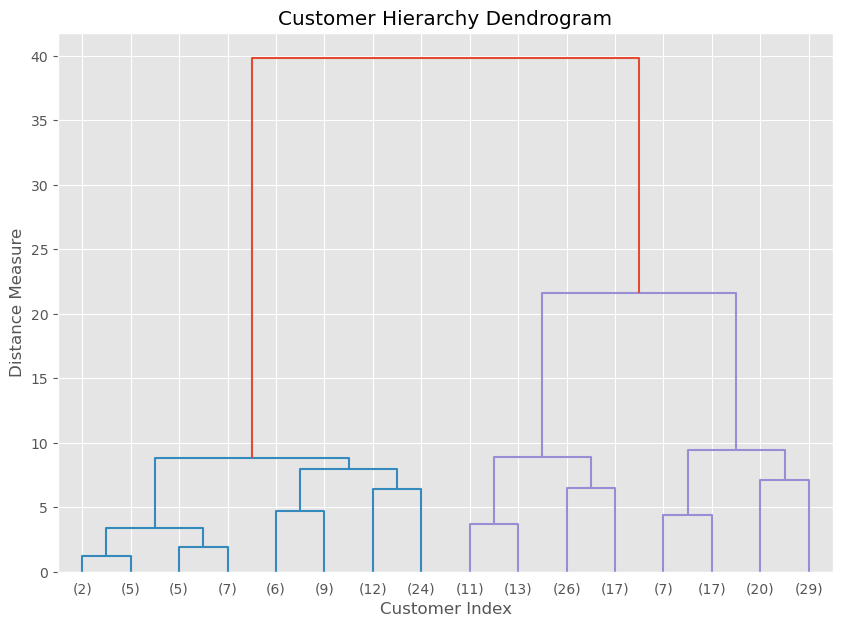

In [40]:
# Plot dendrogram with different customization
plt.figure(figsize=(10, 7))  # Adjusted size
dendrogram(linkage_matrix, truncate_mode='level', p=3, leaf_font_size=10)  # Different truncation
plt.title('Customer Hierarchy Dendrogram')
plt.xlabel('Customer Index')
plt.ylabel('Distance Measure')
plt.show()

In [41]:
# Cluster Profiling
print("\nCluster Averages:")
print(bank.groupby('cluster_group').mean())


Cluster Averages:
                spending  advance_payments  probability_of_full_payment  \
cluster_group                                                             
0              11.856944         13.247778                     0.848253   
1              18.495373         16.203433                     0.884210   
2              14.437887         14.337746                     0.881597   

               current_balance  credit_limit  min_payment_amt  \
cluster_group                                                   
0                     5.231750      2.849542         4.742389   
1                     6.175687      3.697537         3.632373   
2                     5.514577      3.259225         2.707341   

               max_spent_in_single_shopping  kmeans_cluster  
cluster_group                                                
0                                  5.101722             1.0  
1                                  6.041701             0.0  
2                              

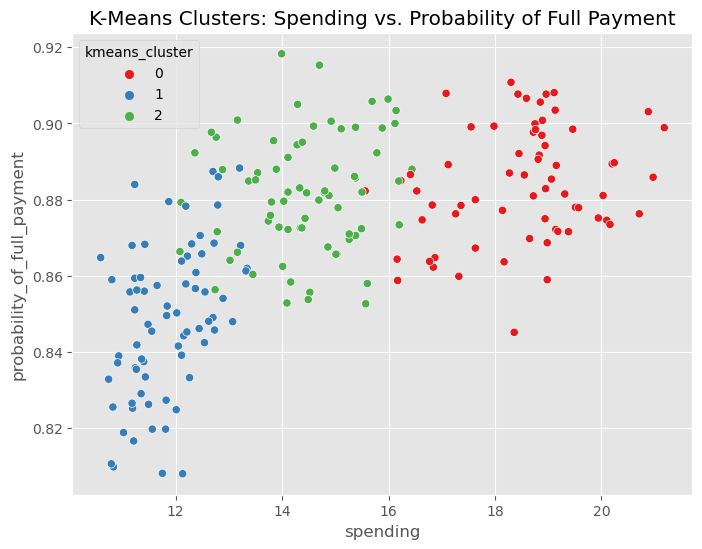

In [42]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='spending', y='probability_of_full_payment', hue='kmeans_cluster', data=bank, palette='Set1')
plt.title('K-Means Clusters: Spending vs. Probability of Full Payment')
plt.show()

In [46]:
from sklearn.preprocessing import StandardScaler
S=StandardScaler()
bank_scaled=S.fit_transform(bank)
k_means = KMeans(n_clusters = 2)
k_means.fit(bank_scaled)

C:\Users\akank\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\akank\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=2)

In [47]:
k_means.labels_

array([0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1])

In [48]:
k_means.inertia_

942.6428593708998

In [49]:
Wss=[]

In [50]:
for i in range(1,9):
    KM = KMeans(n_clusters=i)
    KM.fit(bank_scaled)
    Wss.append(KM.inertia_)

C:\Users\akank\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\akank\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\akank\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\akank\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

In [51]:
Wss

[1890.0,
 942.6428593708998,
 430.6589731513006,
 388.6441640423204,
 349.4621857042588,
 308.4735651260775,
 281.8307338790658,
 253.60263538341817]

In [52]:
k_means = KMeans(n_clusters = 2)
k_means.fit(bank_scaled)
labels = k_means.labels_

C:\Users\akank\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\akank\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [53]:
bank["Clus_kmeans"] = labels
bank.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,cluster_group,kmeans_cluster,Clus_kmeans
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1,0,1
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,2,2,0
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1,0,1
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,0,1,0
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1,0,1


In [54]:
bank['Clus_kmeans'].value_counts()

Clus_kmeans
0    143
1     67
Name: count, dtype: int64

In [56]:
wardlink = linkage(bank_scaled, method = 'ward')
clusters_maxclust = fcluster(wardlink, 2, criterion='maxclust')
clusters_maxclust

array([1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1,
       2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1,
       1, 2, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2,
       1, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1,
       2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2,
       1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 2, 2], dtype=int32)

In [57]:
clusters_dist = fcluster(wardlink, 25, criterion='distance')
clusters_dist

array([1, 2, 1, 3, 1, 3, 3, 2, 1, 3, 1, 2, 3, 1, 2, 3, 2, 3, 3, 3, 3, 3,
       1, 3, 2, 1, 2, 3, 3, 3, 2, 3, 3, 2, 3, 3, 3, 3, 3, 1, 1, 2, 1, 1,
       3, 3, 2, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 3, 3, 1, 2, 3, 3, 2, 2, 1,
       1, 2, 1, 3, 2, 3, 1, 1, 3, 1, 2, 3, 1, 2, 2, 2, 2, 1, 3, 2, 1, 2,
       1, 3, 2, 1, 2, 3, 3, 1, 1, 1, 3, 1, 2, 1, 2, 1, 2, 1, 1, 3, 3, 1,
       2, 2, 1, 3, 3, 1, 2, 2, 3, 1, 2, 3, 3, 3, 2, 2, 1, 3, 2, 2, 3, 2,
       2, 1, 3, 1, 1, 3, 1, 2, 2, 2, 3, 3, 2, 3, 1, 3, 2, 3, 2, 3, 2, 2,
       3, 2, 2, 3, 2, 1, 1, 3, 1, 1, 1, 3, 2, 2, 2, 3, 2, 3, 2, 1, 1, 1,
       2, 3, 2, 3, 2, 2, 2, 2, 1, 1, 3, 2, 2, 3, 3, 2, 3, 1, 2, 1, 1, 3,
       1, 3, 2, 1, 2, 3, 1, 2, 1, 2, 2, 2], dtype=int32)

In [58]:
bank['clusters_maxclust']=clusters_maxclust
bank['clusters_dist']=clusters_dist
bank.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,cluster_group,kmeans_cluster,Clus_kmeans,clusters_maxclust,clusters_dist
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1,0,1,1,1
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,2,2,0,2,2
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1,0,1,1,1
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,0,1,0,2,3
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1,0,1,1,1


In [59]:
bank['match'] = bank['clusters_maxclust'] - bank['clusters_dist']
bank['match'].value_counts()

match
 0    138
-1     72
Name: count, dtype: int64

In [60]:
kmc1=bank.drop(['clusters_maxclust','clusters_dist'],axis=1)[(bank.Clus_kmeans == 0)]
kmc1.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,cluster_group,kmeans_cluster,Clus_kmeans,match
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,2,2,0,0
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,0,1,0,-1
5,12.70,13.41,0.8874,5.183,3.091,8.456,5.000,0,1,0,-1
6,12.02,13.33,0.8503,5.350,2.810,4.271,5.308,0,1,0,-1
7,13.74,14.05,0.8744,5.482,3.114,2.932,4.825,2,2,0,0


In [61]:
kmc2=bank.drop(['clusters_maxclust','clusters_dist'],axis=1)[(bank.Clus_kmeans == 1)]
kmc2.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,cluster_group,kmeans_cluster,Clus_kmeans,match
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1,0,1,0
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1,0,1,0
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1,0,1,0
8,18.17,16.26,0.8637,6.271,3.512,2.853,6.273,1,0,1,0
10,18.55,16.22,0.8865,6.153,3.674,1.738,5.894,1,0,1,0


In [62]:
hc1=bank.drop(['Clus_kmeans','clusters_dist'],axis=1)[(bank['clusters_maxclust'] == 1)]
hc1.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,cluster_group,kmeans_cluster,clusters_maxclust,match
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1,0,1,0
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1,0,1,0
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1,0,1,0
8,18.17,16.26,0.8637,6.271,3.512,2.853,6.273,1,0,1,0
10,18.55,16.22,0.8865,6.153,3.674,1.738,5.894,1,0,1,0


In [63]:
hc2=bank.drop(['Clus_kmeans','clusters_dist'],axis=1)[(bank['clusters_maxclust'] == 2)]
hc2.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,cluster_group,kmeans_cluster,clusters_maxclust,match
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,2,2,2,0
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,0,1,2,-1
5,12.70,13.41,0.8874,5.183,3.091,8.456,5.000,0,1,2,-1
6,12.02,13.33,0.8503,5.350,2.810,4.271,5.308,0,1,2,-1
7,13.74,14.05,0.8744,5.482,3.114,2.932,4.825,2,2,2,0


In [64]:
round(kmc1.describe(),2).T

,count,mean,std,min,25%,50%,75%,max
spending,143.0,13.14,1.58,10.59,11.82,12.79,14.40,16.44
advance_payments,143.0,13.79,0.71,12.41,13.22,13.67,14.38,15.27
probability_of_full_payment,143.0,0.86,0.02,0.81,0.85,0.87,0.88,0.92
current_balance,143.0,5.37,0.23,4.90,5.18,5.36,5.54,5.92
credit_limit,143.0,3.05,0.25,2.63,2.84,3.05,3.25,3.58
min_payment_amt,143.0,3.73,1.63,0.77,2.46,3.60,4.86,8.46
max_spent_in_single_shopping,143.0,5.11,0.23,4.52,5.00,5.10,5.23,5.88
cluster_group,143.0,0.99,1.00,0.00,0.00,0.00,2.00,2.00
kmeans_cluster,143.0,1.50,0.50,1.00,1.00,1.00,2.00,2.00
Clus_kmeans,143.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [65]:
round(kmc2.describe(),2).T

,count,mean,std,min,25%,50%,75%,max
spending,67.0,18.50,1.28,15.56,17.59,18.75,19.14,21.18
advance_payments,67.0,16.20,0.55,14.89,15.86,16.23,16.58,17.25
probability_of_full_payment,67.0,0.88,0.01,0.85,0.87,0.88,0.90,0.91
current_balance,67.0,6.18,0.24,5.72,6.01,6.15,6.33,6.68
credit_limit,67.0,3.70,0.17,3.39,3.56,3.72,3.81,4.03
min_payment_amt,67.0,3.63,1.21,1.47,2.85,3.62,4.42,6.68
max_spent_in_single_shopping,67.0,6.04,0.23,5.48,5.88,6.01,6.19,6.55
cluster_group,67.0,1.00,0.00,1.00,1.00,1.00,1.00,1.00
kmeans_cluster,67.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Clus_kmeans,67.0,1.00,0.00,1.00,1.00,1.00,1.00,1.00


In [66]:
round(hc1.describe(),2).T

,count,mean,std,min,25%,50%,75%,max
spending,67.0,18.50,1.28,15.56,17.59,18.75,19.14,21.18
advance_payments,67.0,16.20,0.55,14.89,15.86,16.23,16.58,17.25
probability_of_full_payment,67.0,0.88,0.01,0.85,0.87,0.88,0.90,0.91
current_balance,67.0,6.18,0.24,5.72,6.01,6.15,6.33,6.68
credit_limit,67.0,3.70,0.17,3.39,3.56,3.72,3.81,4.03
min_payment_amt,67.0,3.63,1.21,1.47,2.85,3.62,4.42,6.68
max_spent_in_single_shopping,67.0,6.04,0.23,5.48,5.88,6.01,6.19,6.55
cluster_group,67.0,1.00,0.00,1.00,1.00,1.00,1.00,1.00
kmeans_cluster,67.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
clusters_maxclust,67.0,1.00,0.00,1.00,1.00,1.00,1.00,1.00


In [67]:
round(hc2.describe(),2).T

,count,mean,std,min,25%,50%,75%,max
spending,143.0,13.14,1.58,10.59,11.82,12.79,14.40,16.44
advance_payments,143.0,13.79,0.71,12.41,13.22,13.67,14.38,15.27
probability_of_full_payment,143.0,0.86,0.02,0.81,0.85,0.87,0.88,0.92
current_balance,143.0,5.37,0.23,4.90,5.18,5.36,5.54,5.92
credit_limit,143.0,3.05,0.25,2.63,2.84,3.05,3.25,3.58
min_payment_amt,143.0,3.73,1.63,0.77,2.46,3.60,4.86,8.46
max_spent_in_single_shopping,143.0,5.11,0.23,4.52,5.00,5.10,5.23,5.88
cluster_group,143.0,0.99,1.00,0.00,0.00,0.00,2.00,2.00
kmeans_cluster,143.0,1.50,0.50,1.00,1.00,1.00,2.00,2.00
clusters_maxclust,143.0,2.00,0.00,2.00,2.00,2.00,2.00,2.00
